<a href="https://colab.research.google.com/github/PedroHudson/PUC_MVP3/blob/main/MVP_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP - Engenharia de Dados**



**1. Objetivo:**

Esse projeto tem como objetivo construir um Bando de Dados na Nuvem. O escopo e desenvolvimento do projeto envolve a busca, coleta, modelagem, carga e análise de dados.

**2. Definição do Problema:**

Para a elaboração desse projeto será utilizado um dataset com dados de faturamento de um escritório de advocacia de médio porte, cuja sede localiza-se na cidade de São Paulo.

O escritório tem 33 anos de história, com forte atuação na área empresarial, reconhecidos pelo mercado jurídico como especialistas nas áreas de processo civil, direito aplicado aos FIDC’s (fundos de investimento em direitos creditórios), negócios empresariais, mercado imobiliário, especialmente loteamentos e negócios fiduciários, além de processo tributário e processo do trabalho.

Visando a confidencialidade e proteção dos dados, seguindo as normas e diretrizes da LGPD (Lei Geral de Proteção de Dados Pessoais), todos os dados confidenciais do dataset foram previamente tratados e transformados, para a utilização das informações de modo ético e seguro, garantindo a segurança dos dados e as boas práticas de governança. Portanto, todos os nomes de pessoas físicas e jurídicas que constam no dataset são fictícios.

O dataset foi disponibilizado através do ERP próprio da empresa no formato de excel, após essa extração foi realizado o tratamento inicial dos dados conforme mencionado acima, e posteriormente o arquivo foi direcionado para um repositório no Github.

Iremos analisar o faturamento da empresa nos últimos 4 anos, demonstraremos o faturamento por ano, por área e por rubrica, visualizaremos também os maiores clientes por faturamento e analisaremos como foi o desempenho do escritório durante e pós pandemia de COVID-19.







**3. Importação das Bibliotecas e Configurações.**

In [46]:
# Importação do Pandas
import pandas as pd

# Importação do Numpy
import numpy as np

# Importação do Pyplot
import matplotlib.pyplot as plt

# Importação de pacotes Matplotlib
from matplotlib import cm

# Importação do Seaborn
import seaborn as sns

# Importação do MissingNo para tratamento de missings
import missingno as ms




# Configuração para não exibir Warnings
import warnings
warnings.filterwarnings('ignore')

**4. Importação do Dataset.**

In [47]:
# Importando dados da url para um dataframe

# url a importar
url_dados = 'https://github.com/PedroHudson/PUC_MVP3/blob/main/Faturamento.xlsx?raw=true'

# carga do dataset através da url
dataset = pd.read_excel(url_dados)


**5. Análise Exploratória - Primeiras Visualizações e Análises.**

In [48]:
# Visualização da quantidade de instâncias e atributos do dataset
dataset.shape

(10397, 5)

*Nessa primeira análise verificamos que o dataset tem 5 atributos e 10397 instâncias.*

In [49]:
# Visualização da quantidade de linhas por coluna
dataset.count()

Data       10397
Cliente    10397
Valor      10397
Rubrica    10397
Área       10397
dtype: int64

*Todos os atributos possuem a mesma quantidade de instâncias.*

In [50]:
# Visualização dos tipos de dados
dataset.dtypes

Data        object
Cliente     object
Valor      float64
Rubrica     object
Área        object
dtype: object

*A visualização dos tipos de dados nos permite verificar que os atributos "Data", "Cliente", "Rubrica" e "Área" são do tipo object, já o atributo "Valor" é do tipo float64.*

In [51]:
# Visualização das primeiras linhas do dataframe
dataset.head()

,Data,Cliente,Valor,Rubrica,Área
0,02/01/2020,Cobra Brasil Fomento Mercantil S.A,969.76,Sucumbência,Recuperação de Crédito
1,02/01/2020,Cobra Brasil Fomento Mercantil S.A,436.39,Honorários de Êxito,Recuperação de Crédito
2,02/01/2020,Grupo Alves Cintra,71.23,Sucumbência,Recuperação de Crédito
3,02/01/2020,Grupo Alves Cintra,33.77,Sucumbência,Contencioso Cível
4,03/01/2020,Escritório Advogados Associados,500.00,Sucumbência,Contencioso Cível


In [52]:
# Visualização das últimas linhas do dataframe
dataset.tail()

,Data,Cliente,Valor,Rubrica,Área
10392,31/08/2023,Minas Finanças Ltda,3700.00,Sucumbência,Recuperação de Crédito
10393,31/08/2023,Auto Mecânica Mister,1998.31,Fee Mensal,Gestão
10394,31/08/2023,Jose Norberto Fomento Mercantil Ltda.,101.48,Honorários de Êxito,Recuperação Judicial e Falência
10395,31/08/2023,Oerca Torres S/A,17.79,Honorários de Êxito,Recuperação Judicial e Falência
10396,31/08/2023,Oerca Torres S/A,127.64,Honorários de Êxito,Recuperação Judicial e Falência


In [57]:
# Verificando nulls do dataset

dataset.isnull().sum()

Data       0
Cliente    0
Valor      0
Rubrica    0
Área       0
dtype: int64

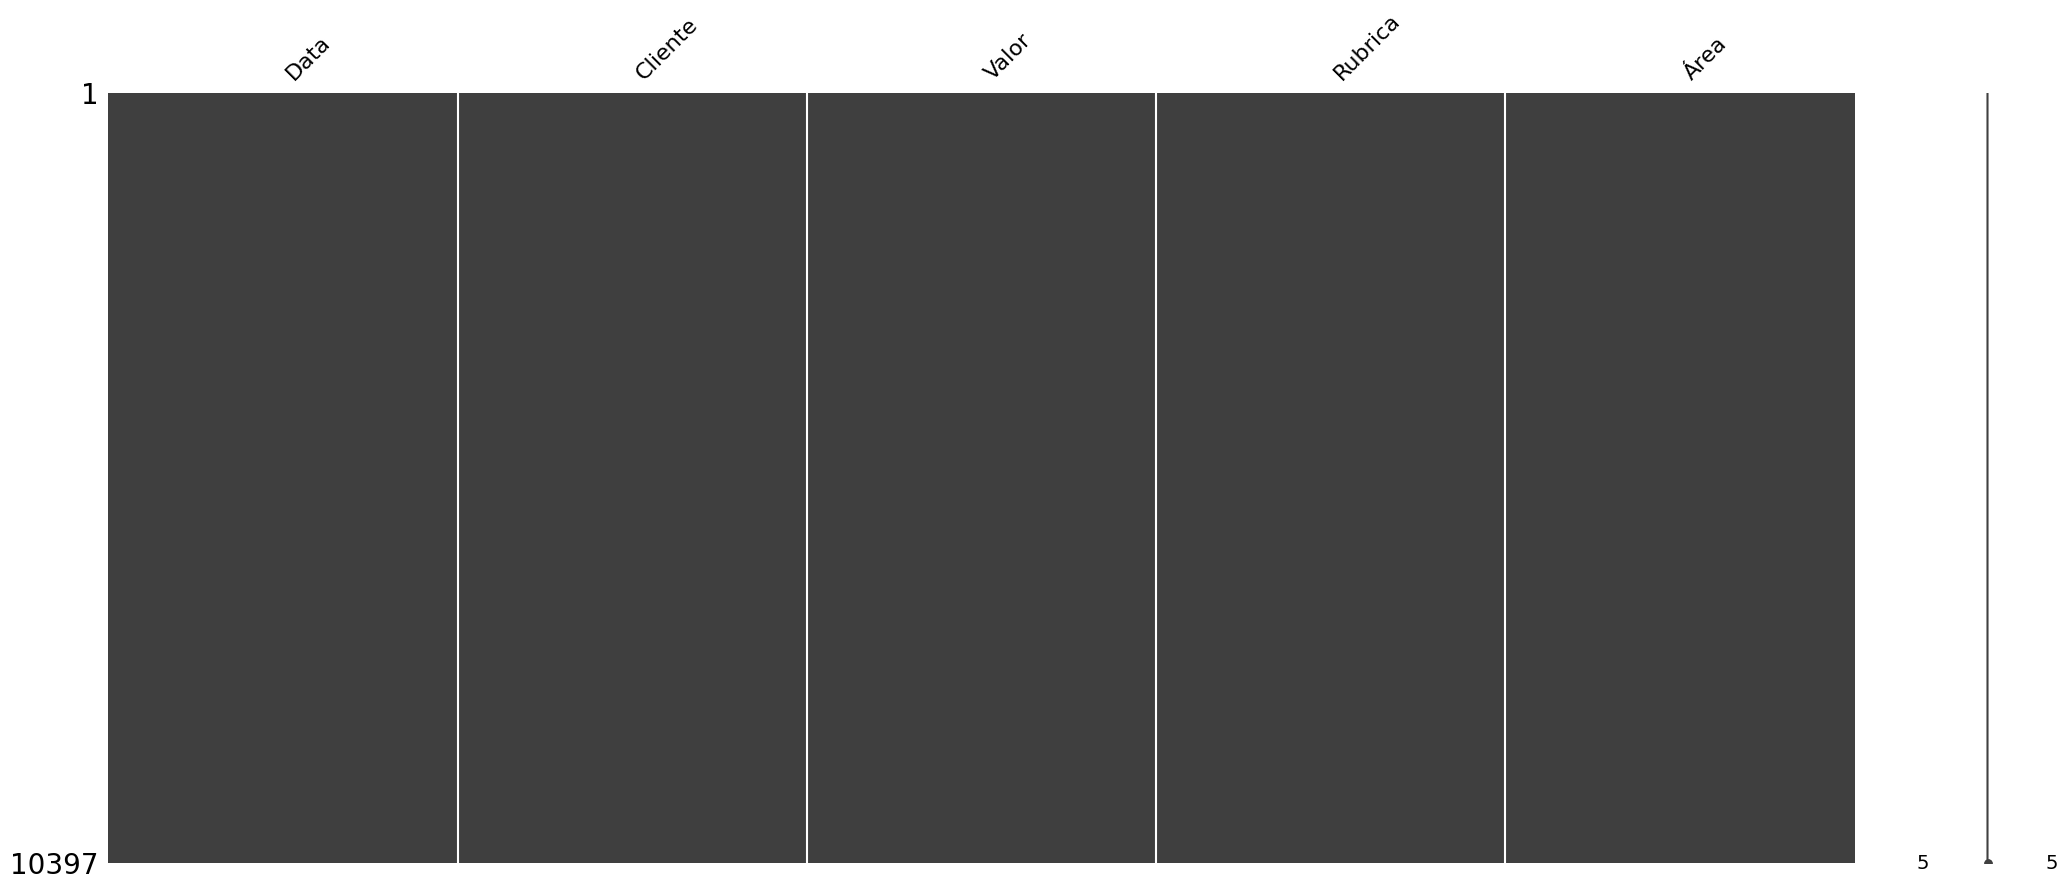

In [60]:
# Nova verificação do dataset para a visualização de Missings

dataset.replace(0, np.nan, inplace=True)

ms.matrix(dataset);

*Diante das informações obtidas através das primeiras visualizações chegamos a conclusão que a qualidade do dataset é muito boa, pois não contém missings, tem a mesma quantidade de linhas para todos os atributos e a classificação dos tipos de dados está correta.*